<a href="https://colab.research.google.com/github/ParitoshP702/BO_vs_RL_Pricing/blob/main/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import random

In [ ]:
# true_coeff = np.array([-150,480,-165,22,-1])

In [ ]:
def revenue(p):
    #  p_vec = np.array([1,p,p**2,p**3,p**4])
     return 100*np.exp(-((p-5)**2)/20)

In [ ]:
def p_vector(p):
    p_vec = np.array([1,p,p**2])
    return p_vec.reshape(len(p_vec),1)

In [ ]:
# def find_barycentre(d):


In [ ]:
b1 = 0
b2 = 0.5
b3 = 1
# b4 = 0.5+(3/28)**0.5
# b5 = 1
barycentric_spanner = [b1,b2,b3]

In [ ]:
def g_fun(p,*args):
    p_vec = np.array([1,p,p**2])
    coeff_array = args
    return -np.sum(coeff_array*p_vec)

In [ ]:
var_cov_inv = np.zeros((3,3))
for b in barycentric_spanner:
    b_vec = p_vector(b)
    var_cov_inv += b_vec@np.transpose(b_vec)

In [ ]:
var_cov = np.linalg.inv(var_cov_inv)

In [ ]:
mu_ = np.array([0,0,0])

In [ ]:
pl = 0
ph = 100

In [ ]:
w = np.random.multivariate_normal(np.array([0,0,0]),var_cov)

In [ ]:
from scipy.optimize import minimize
price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (w),bounds = [(pl,ph)])["x"][0]

<ipython-input-52-405c292db23a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_vec = np.array([1,p,p**2])


In [ ]:
w

array([ 0.64750043,  2.02248155, -2.54600833])

In [ ]:
p_array = []

In [ ]:
p_curr = p_vector(price_estimate)
p_array.append(price_estimate)

In [ ]:
reven_array = []
price_estimate

0.3971867481441011

In [ ]:
np.linalg.eig(var_cov)

(array([49.28181371,  0.21614862,  1.50203766]),
 array([[-0.07333072,  0.76826332, -0.63591987],
        [ 0.7203976 ,  0.48175309,  0.49894014],
        [-0.68967377,  0.4215275 ,  0.58878235]]))

In [ ]:
from tqdm import tqdm

In [ ]:
def update_mean(rev,p_ar):
    sum = 0
    for i in range(len(rev)):
        price = p_ar[i]
        p = p_vector(price)
        sum += rev[i]*p/9
    return sum


In [ ]:
def update_mat(p_ar):
    sum = 0
    for i in range(len(p_ar)):
        price = p_ar[i]
        p = p_vector(price)
        sum += (p@np.transpose(p))/9
    return sum

In [ ]:
def Thompson():
    epsilon_array = []
    def p_vector(p):
        p_vec = np.array([1,p,p**2])
        return p_vec.reshape(len(p_vec),1)

    def g_fun(p,*args):
          p_vec = np.array([1,p,p**2])
          coeff_array = args
          return -np.sum(coeff_array*p_vec)
    var_cov_inv = np.zeros((3,3))
    for b in barycentric_spanner:
        b_vec = p_vector(b)
        var_cov_inv += b_vec@np.transpose(b_vec)

    var_cov = np.linalg.inv(var_cov_inv)
    mu_ = np.array([0,0,0])
    pl = 0
    ph = 100
    w = np.random.multivariate_normal(np.array([0,0,0]),var_cov)
    price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (w),bounds = [(pl,ph)])["x"][0]
    p_array = []
    p_curr = p_vector(price_estimate)
    p_array.append(price_estimate)
    reven_array = []
    def update_mat(p_ar):
        sum = 0
        for i in range(len(p_ar)):
            price = p_ar[i]
            p = p_vector(price)
            sum += (p@np.transpose(p))/9
        return sum

    for i in tqdm(range(100)):
        rev_curr = 100*np.exp(-((price_estimate-5)**2)/20)+np.random.normal(0,3)
        reven_array.append(rev_curr)
        var_copy = var_cov
        mu_copy = mu_
        var_cov = np.linalg.inv(np.linalg.inv(var_copy) + update_mat(p_array))
        # np.linalg.eig(var_cov)
        min_ev = np.min(np.linalg.eig(var_cov)[0])
        if min_ev <= 0:
            var_cov += np.diag(np.array([1e-5,1e-5,1e-5]))
        mu_ = var_cov@(np.linalg.inv(var_copy)@mu_copy.reshape(3,1) + update_mean(reven_array,p_array))
    #     mu_ = var_cov@( rev_curr*p_curr/100)
        mu_ = mu_.reshape(3,)
        w_sample = np.random.multivariate_normal(mu_,var_cov)
        price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (w_sample),bounds = [(pl,ph)])["x"][0]
        p_curr = p_vector(price_estimate)
        p_array.append(price_estimate)
        epsilon =np.max([0,np.min(100 - np.array(reven_array))])
        epsilon_array.append(epsilon)
    return np.array(epsilon_array)


In [ ]:
best_till_now = []
for i in tqdm(range(10)):
  # print(Thompson())
  best_till_now.append(Thompson())
# np.mean(best_till_now)

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-67-747467245d7c>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_vec = np.array([1,p,p**2])

100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


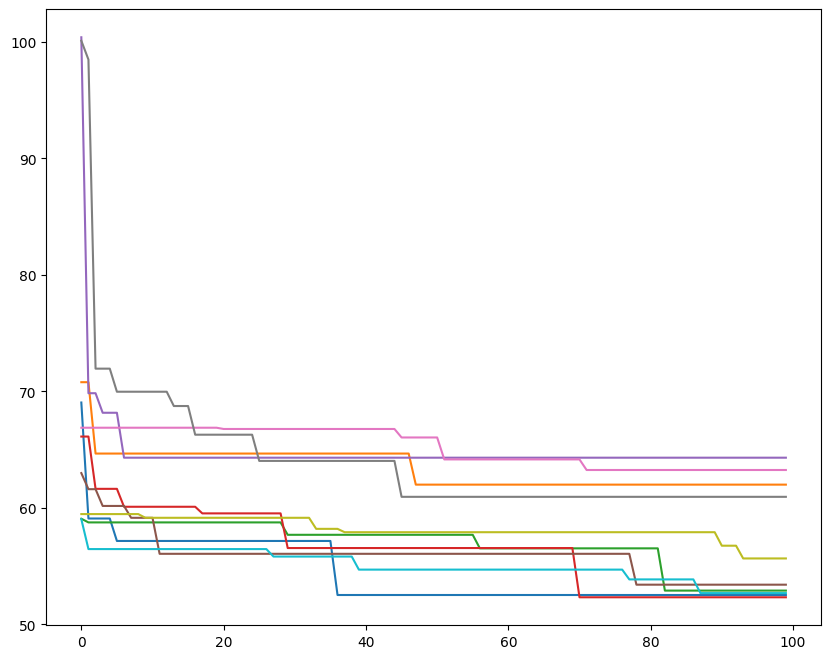

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
for i in range(10):
  plt.plot(best_till_now[i])

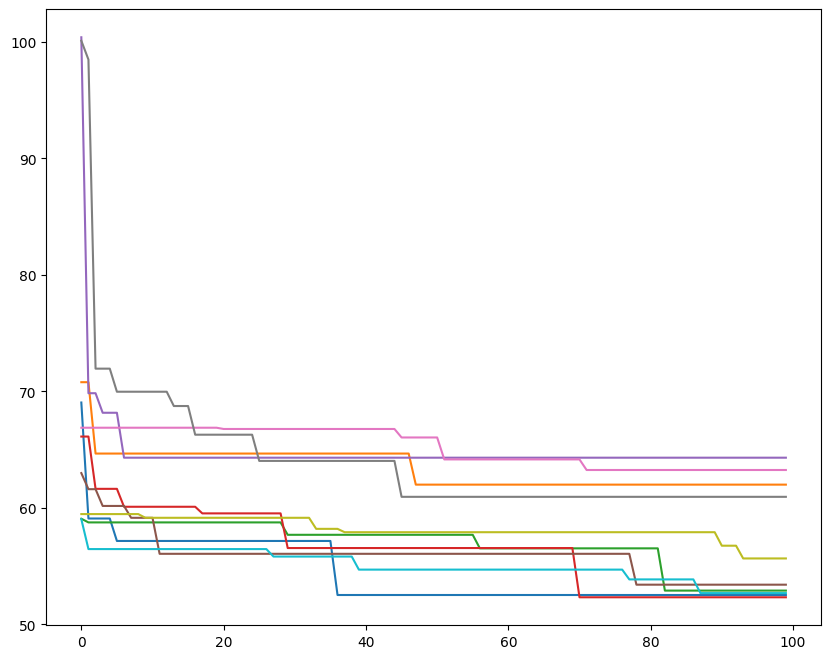

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
for i  in range(10):
  plt.plot(best_till_now[i])

In [ ]:
best_till_now_averaged = np.mean(best_till_now,axis = 0)

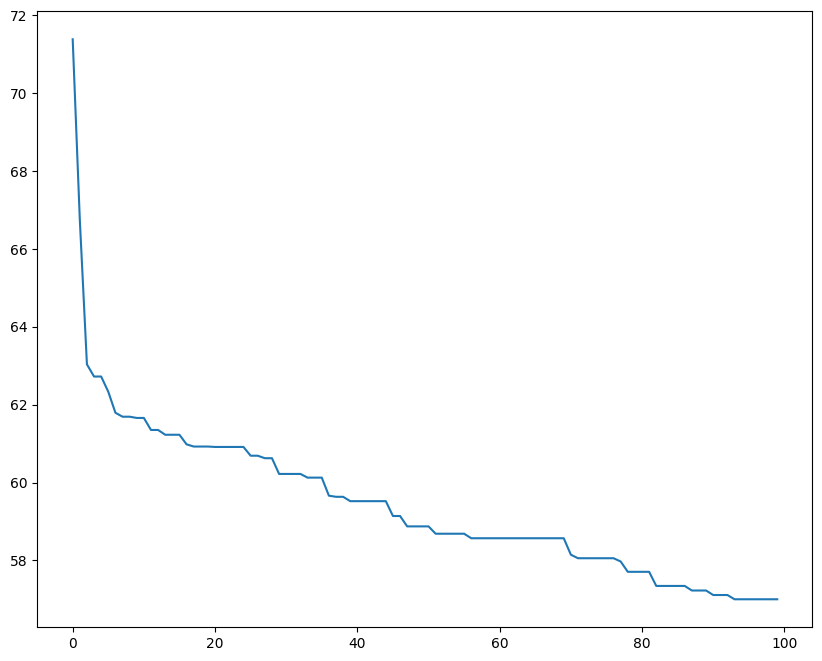

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(best_till_now_averaged)

In [ ]:
import pickle

In [ ]:
file_path = open("Thompson_exp_reven.txt","wb")
pickle.dump(best_till_now_averaged,file_path)

In [ ]:
file_path = open("CILS_exp_reven.txt","rb")
best_till_now_CILS = pickle.load(file_path)

In [ ]:
best_till_now_averaged

array([71.388697  , 66.75095338, 63.03725972, 62.72561841, 62.72561841,
       62.33487091, 61.79544061, 61.69363907, 61.69363907, 61.66182015,
       61.66182015, 61.35282508, 61.35282508, 61.23009301, 61.23009301,
       61.23009301, 60.98394196, 60.92718075, 60.92718075, 60.92718075,
       60.91638056, 60.91638056, 60.91638056, 60.91638056, 60.91638056,
       60.69151401, 60.69151401, 60.62740216, 60.62740216, 60.22354285,
       60.22354285, 60.22354285, 60.22354285, 60.12862729, 60.12862729,
       60.12862729, 59.66485711, 59.63610031, 59.63610031, 59.52393311,
       59.52393311, 59.52393311, 59.52393311, 59.52393311, 59.52393311,
       59.14276729, 59.14276729, 58.87603317, 58.87603317, 58.87603317,
       58.87603317, 58.68773399, 58.68773399, 58.68773399, 58.68773399,
       58.68773399, 58.57148217, 58.57148217, 58.57148217, 58.57148217,
       58.57148217, 58.57148217, 58.57148217, 58.57148217, 58.57148217,
       58.57148217, 58.57148217, 58.57148217, 58.57148217, 58.57